In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
rank = pd.read_csv('20241015 Market Cap Rank.csv', index_col = 'Rank')
rank['Trillion Cap'] = rank['marketcap']/1000000000000
top = 10
top_rank = rank.nlargest(top, 'marketcap').sort_values('marketcap', ascending=True)
rank.head()

,Name,Symbol,marketcap,price (USD),country,Trillion Cap
Rank,,,,,,
1,Apple,AAPL,3516708421632,231.30,United States,3.516708
2,NVIDIA,NVDA,3386857226240,138.07,United States,3.386857
3,Microsoft,MSFT,3115484446720,419.14,United States,3.115484
4,Alphabet (Google),GOOG,2038353231872,166.35,United States,2.038353
5,Amazon,AMZN,1968344662016,187.54,United States,1.968345


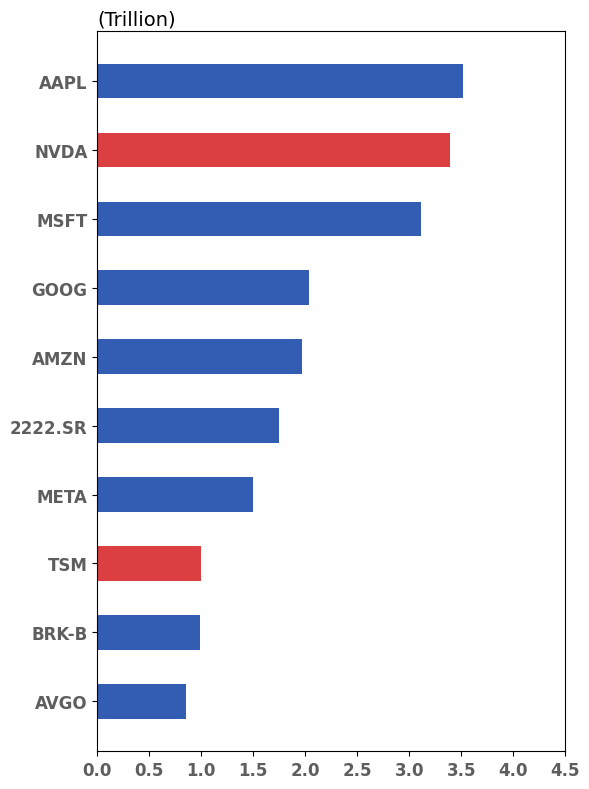

In [3]:
colors = ['#D30F11' if symbol in ['NVDA', 'TSM'] else '#0033A0' for symbol in top_rank['Symbol']]

plt.figure(figsize=(6, 8))
plt.barh(top_rank['Symbol'], top_rank['Trillion Cap'], color=colors, height=0.5, alpha=0.8)
plt.xticks(fontsize=12, fontweight='bold', color='#5E5E5E')
plt.yticks(fontsize=12, fontweight='bold', color='#5E5E5E')

formatter = ticker.ScalarFormatter(useOffset=False)
formatter.set_scientific(False)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().annotate('(Trillion)', xy=(0.0, 1.0), xycoords='axes fraction', fontsize=14, xytext=(0, 5), textcoords='offset points', ha='left', va='baseline')
plt.xlim(0, 4.5)

plt.tight_layout()
plt.savefig("Cap Rank Barplot.png", dpi=144, transparent=True)
plt.show()